## Abaqus simulation 

This notebook presents a comprehensive machine learning workflow for predicting target variables using a diverse set of regression algorithms. The models include both linear and non-linear approaches such as Linear Regression, Ridge, Lasso, Elastic Net, Decision Trees, Random Forest, Gradient Boosting, XGBoost, KNN, and Support Vector Regression. Each model is trained and evaluated on a simulation-based dataset to compare predictive performance. The notebook enables systematic assessment of regression techniques for biomedical applications.


In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import ydata_profiling as ydp

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
# from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_excel('combined_data_all.xlsx')
# df.drop(['File', 'Bone Plate Modulus'], axis=1, inplace=True)
# df.drop(0, axis=0, inplace=True)


In [3]:
df

Days       YMRoM       MSC        FB        CC        OB        GT  \
0        1    0.200000  0.000000  0.000000  0.000000  0.000000  0.000000   
1        2    0.199860  0.294718  0.003749  0.010867  0.136919  0.985015   
2        3    0.360032  0.246635  0.007463  0.021193  0.262567  0.957368   
3        4    1.219640  0.204900  0.010148  0.031118  0.364455  0.922780   
4        5    2.872655  0.181334  0.010867  0.040671  0.417484  0.903238   
...    ...         ...       ...       ...       ...       ...       ...   
1448   108  710.958458  0.002760  0.000000  0.000009  0.831331  0.232275   
1449   109  716.305268  0.002699  0.000000  0.000008  0.833203  0.229675   
1450   110  721.317184  0.002642  0.000000  0.000008  0.834948  0.227675   
1451   111  725.863531  0.002591  0.000000  0.000007  0.836605  0.225549   
1452   112  729.863934  0.002541  0.000000  0.000006  0.837986  0.223948   

            FT        CT        BT  Modulus  
0     0.000000  0.000000  0.000000        5  
1     0.000750  0.000543  0.013692        5  
2     0.002158  0.001580  0.038894        5  
3     0.003828  0.003078  0.070314        5  
4     0.004496  0.004825  0.087441        5  
...        ...       ...       ...      ...  
1448  0.000000  0.000003  0.767722      100  
1449  0.000000  0.000003  0.770322      100  
1450  0.000000  0.000003  0.772322      100  
1451  0.000000  0.000003  0.774449      100  
1452  0.000000  0.000003  0.776049      100  

[1453 rows x 11 columns]

In [4]:
df.isnull().sum()

Days       0
YMRoM      0
MSC        0
FB         0
CC         0
OB         0
GT         0
FT         0
CT         0
BT         0
Modulus    0
dtype: int64

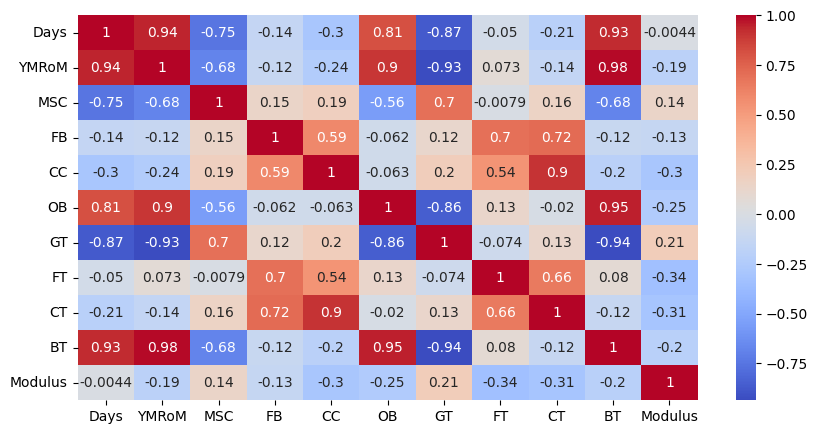

In [5]:
# making the heatmap of the correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=False)
plt.show()

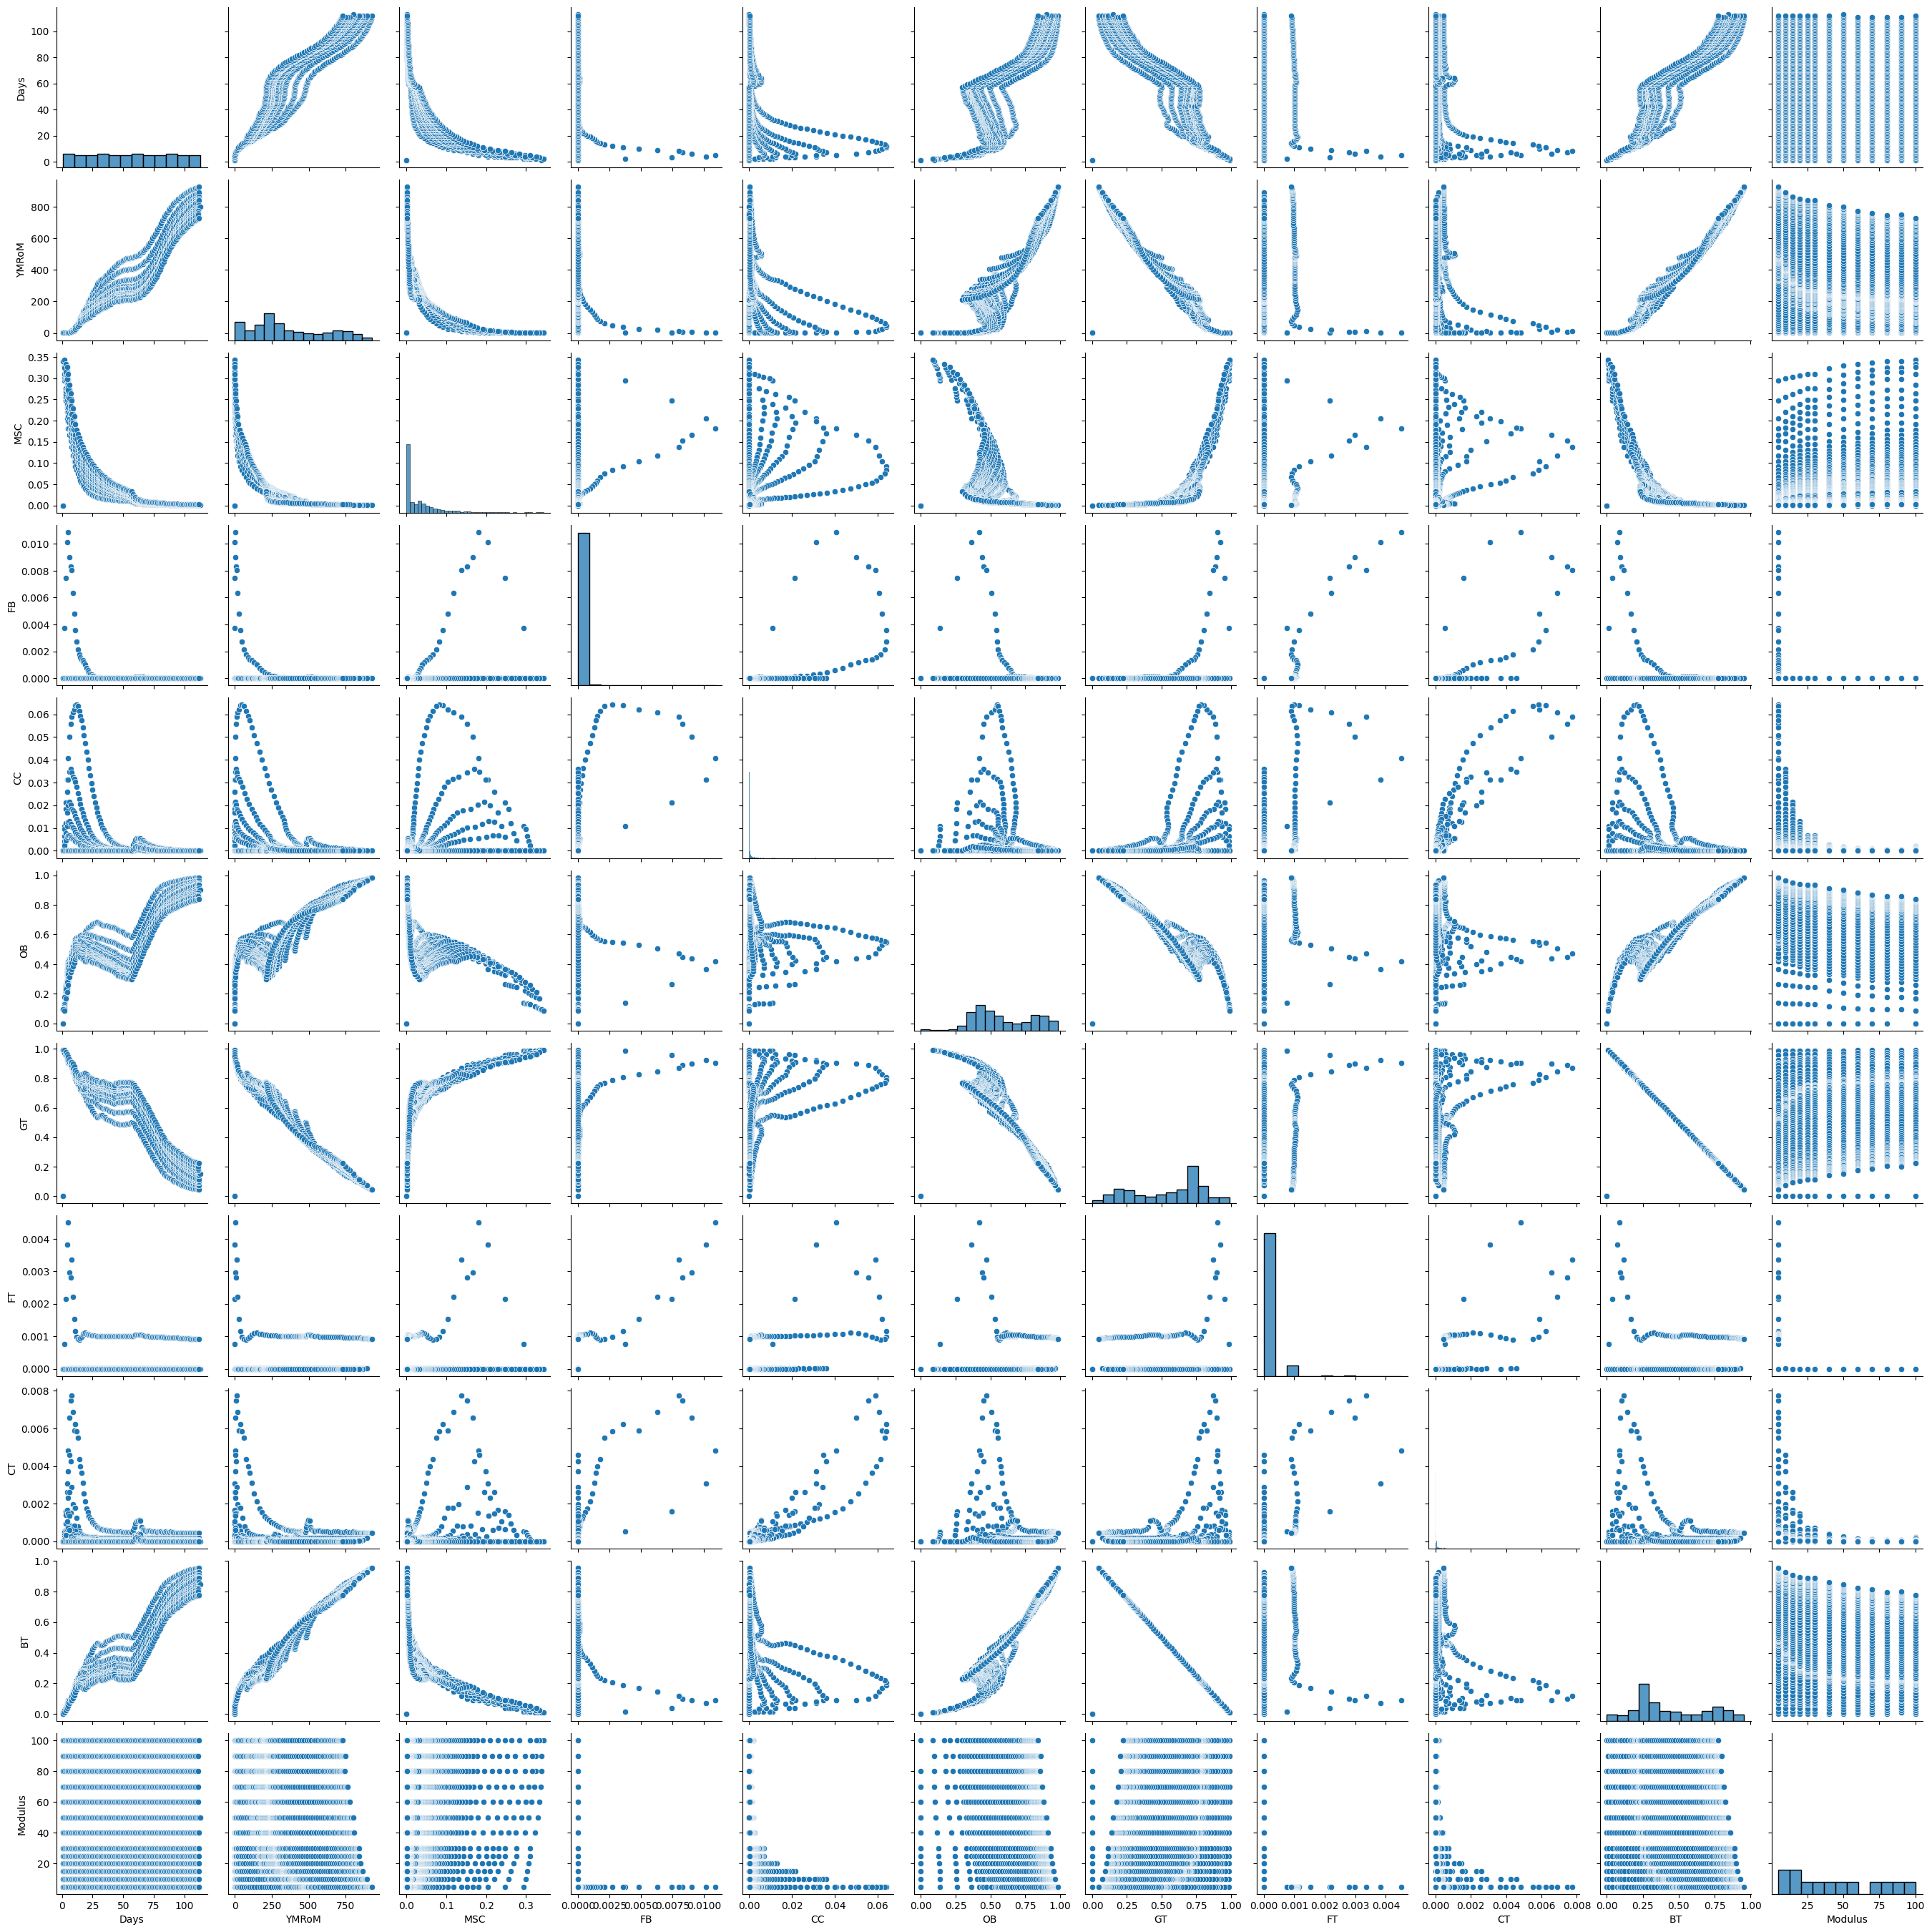

In [6]:
# making the pairplot of the data
sns.pairplot(df)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Days     1453 non-null   int64  
 1   YMRoM    1453 non-null   float64
 2   MSC      1453 non-null   float64
 3   FB       1453 non-null   float64
 4   CC       1453 non-null   float64
 5   OB       1453 non-null   float64
 6   GT       1453 non-null   float64
 7   FT       1453 non-null   float64
 8   CT       1453 non-null   float64
 9   BT       1453 non-null   float64
 10  Modulus  1453 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 125.0 KB


In [8]:
X = df.drop(['Days', 'YMRoM', 'Modulus'], axis=1)
y = df[['Days', 'YMRoM', 'Modulus']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=697)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1162, 8), (291, 8), (1162, 3), (291, 3))

In [11]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train_1)
# X_test = scaler.transform(X_test_1)

In [12]:
# X_train.shape, X_test.shape

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(),
    'Lasso Regression': MultiOutputRegressor(Lasso()),
    'Elastic Net Regression': MultiOutputRegressor(ElasticNet()),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting': MultiOutputRegressor(GradientBoostingRegressor()),
    'KNN Regression': KNeighborsRegressor(),
    'Support Vector Regression': MultiOutputRegressor(SVR()),
    'XGBoost Regression': MultiOutputRegressor(XGBRegressor())
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    })

results = pd.DataFrame(results)
results.sort_values(by='R2', inplace=True, ascending=False)
results.reset_index(drop=True, inplace=True)
results

Model           MSE        MAE        R2
0          XGBoost Regression     18.497621   2.438068  0.988804
1    Random Forest Regression     27.341771   3.239382  0.981556
2           Gradient Boosting     52.312512   4.592391  0.973774
3    Decision Tree Regression     58.672155   4.491035  0.962946
4              KNN Regression    108.820407   5.657754  0.914455
5       Polynomial Regression    220.681878   9.394839  0.787493
6           Linear Regression    410.517425  15.326930  0.730208
7            Ridge Regression    624.586627  19.400179  0.669897
8            Lasso Regression    793.169799  22.482618  0.626743
9   Support Vector Regression   4424.672471  37.387513  0.590469
10     Elastic Net Regression  12395.820990  67.558242  0.259123

In [15]:
difference = pd.DataFrame({
    'Actual Days': y_test.to_numpy()[:,0],
    'Predicted Days': y_pred[:,0],
    'Difference Days': y_test.to_numpy()[:,0] - y_pred[:,0],
    'Actual YMRoM': y_test.to_numpy()[:,1],
    'Predicted YMRoM': y_pred[:,1],
    'Difference YMRoM': y_test.to_numpy()[:,1] - y_pred[:,1],
    'Actual Young Modulus': y_test.to_numpy()[:,2],
    'Predicted Young Modulus': y_pred[:,2],
    'Difference Young Modulus': y_test.to_numpy()[:,2] - y_pred[:,2]
})

difference.to_excel('Difference - Conv - Combined Algorithms.xlsx', index=False)

In [23]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [105]:
# difference = pd.DataFrame({
#     'Actual Days': y_test.to_numpy()[:,0],
#     'Predicted Days': y_pred[:,0],
#     'Difference Days': y_test.to_numpy()[:,0] - y_pred[:,0],
#     'Actual Young Modulus': y_test.to_numpy()[:,1],
#     'Predicted Young Modulus': y_pred[:,1],
#     'Difference Young Modulus': y_test.to_numpy()[:,1] - y_pred[:,1]
# })

# difference.to_excel('Difference in Days and Young Modulus Decision Tree.xlsx', index=False)